In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
train_df = pd.read_table('train.tsv')
test_df = pd.read_table('test.tsv')
print(train_df.shape, test_df.shape)
print("train and test data sets are loaded")

(1482535, 8) (693359, 7)
train and test data sets are loaded


In [4]:
train_df.head()
y_dummy = train_df['price']
del train_df['train_id']
del train_df['price']
X_dummy = train_df
print(y_dummy.shape)
print(X_dummy.shape)

(1482535,)
(1482535, 6)


In [ ]:
def missing_categorical(df):
    print("Check for missing values in appended data")
    print(df.apply(lambda x:sum(x.isnull())))
    print("\n")
    print("Check for categorical Values in appended data")
    print(df.apply(lambda x: len(x.unique())))

In [5]:
#find number of missing and categorical values in the data
print("Check for missing values")
print(X_dummy.apply(lambda x:sum(x.isnull())))
#
print("\n")
print("Check for categorical Values")
print(X_dummy.apply(lambda x: len(x.unique())))

Check for missing values
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
shipping                  0
item_description          4
dtype: int64


Check for categorical Values
name                 1225273
item_condition_id          5
category_name           1288
brand_name              4810
shipping                   2
item_description     1281427
dtype: int64


In [6]:
print(test_df.columns)
print(test_df.shape)

Index(['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object')
(693359, 7)


In [7]:
print("Check for missing values in test data")
print(test_df.apply(lambda x:sum(x.isnull())))
#
print("\n")
print("Check for categorical Values in test data")
print(test_df.apply(lambda x: len(x.unique())))

Check for missing values in test data
test_id                   0
name                      0
item_condition_id         0
category_name          3058
brand_name           295525
shipping                  0
item_description          0
dtype: int64


Check for categorical Values in test data
test_id              693359
name                 601117
item_condition_id         5
category_name          1224
brand_name             3901
shipping                  2
item_description     609555
dtype: int64


In [8]:
X_dummy_test = test_df.copy()
del X_dummy_test['test_id']
print(X_dummy_test.shape)
print(X_dummy_test.columns)

(693359, 6)
Index(['name', 'item_condition_id', 'category_name', 'brand_name', 'shipping',
       'item_description'],
      dtype='object')


In [9]:
print(X_dummy.columns)
X_dummy_test['Type'] ="test"
X_dummy['Type'] ="train"

Index(['name', 'item_condition_id', 'category_name', 'brand_name', 'shipping',
       'item_description'],
      dtype='object')


In [10]:
append_working = X_dummy.append(X_dummy_test)
print("train data: ",X_dummy.shape)
print("\n")
print("test data: ",X_dummy_test.shape)
print("\n")
print("Appended data: ",append_working.shape)
print("Appended data columns", append_working.columns)

train data:  (1482535, 7)


test data:  (693359, 7)


Appended data:  (2175894, 7)
Appended data columns Index(['name', 'item_condition_id', 'category_name', 'brand_name', 'shipping',
       'item_description', 'Type'],
      dtype='object')


In [11]:
print("Check for missing values in appended data")
print(append_working.apply(lambda x:sum(x.isnull())))
#
print("\n")
print("Check for categorical Values in appended data")
print(append_working.apply(lambda x: len(x.unique())))

Check for missing values in appended data
name                      0
item_condition_id         0
category_name          9385
brand_name           928207
shipping                  0
item_description          4
Type                      0
dtype: int64


Check for categorical Values in appended data
name                 1750617
item_condition_id          5
category_name           1311
brand_name              5290
shipping                   2
item_description     1862038
Type                       2
dtype: int64


In [12]:
print(append_working.category_name[0:10], append_working.item_description[0:10])

0                                    Men/Tops/T-shirts
1    Electronics/Computers & Tablets/Components & P...
2                          Women/Tops & Blouses/Blouse
3                   Home/Home Décor/Home Décor Accents
4                              Women/Jewelry/Necklaces
5                                    Women/Other/Other
6                             Women/Swimwear/Two-Piece
7                      Sports & Outdoors/Apparel/Girls
8                      Sports & Outdoors/Apparel/Girls
9             Vintage & Collectibles/Collectibles/Doll
Name: category_name, dtype: object 0                                   No description yet
1    This keyboard is in great condition and works ...
2    Adorable top with a hint of lace and a key hol...
3    New with tags. Leather horses. Retail for [rm]...
4            Complete with certificate of authenticity
5    Banana republic bottoms, Candies skirt with ma...
6    Size small but straps slightly shortened to fi...
7    You get three pairs of So

In [13]:
append_working['category_name'] = append_working['category_name'].fillna("No Category")
append_working['brand_name'] = append_working['brand_name'].fillna("No Brand")
append_working['item_description'] = append_working['item_description'].fillna("No description")

In [14]:
print("Check for missing values in appended data")
print(append_working.apply(lambda x:sum(x.isnull())))
#
print("\n")
print("Check for categorical Values in appended data")
print(append_working.apply(lambda x: len(x.unique())))

Check for missing values in appended data
name                 0
item_condition_id    0
category_name        0
brand_name           0
shipping             0
item_description     0
Type                 0
dtype: int64


Check for categorical Values in appended data
name                 1750617
item_condition_id          5
category_name           1311
brand_name              5290
shipping                   2
item_description     1862037
Type                       2
dtype: int64


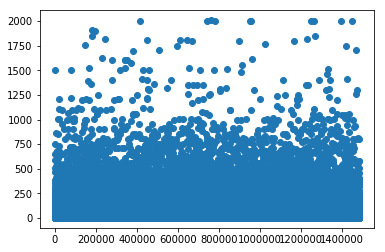

In [15]:
#Plot the output data
%matplotlib inline
plt.scatter(range(0, len(y_dummy)), y_dummy)

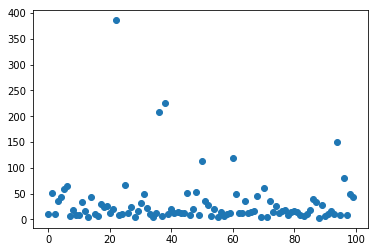

In [16]:
plt.scatter(range(0, 100), y_dummy[0:100])

In [17]:
print(y_dummy.describe(include=[np.number]))

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64


reference for plots :
https://www.kaggle.com/konohayui/mercari-price-suggestion-eda

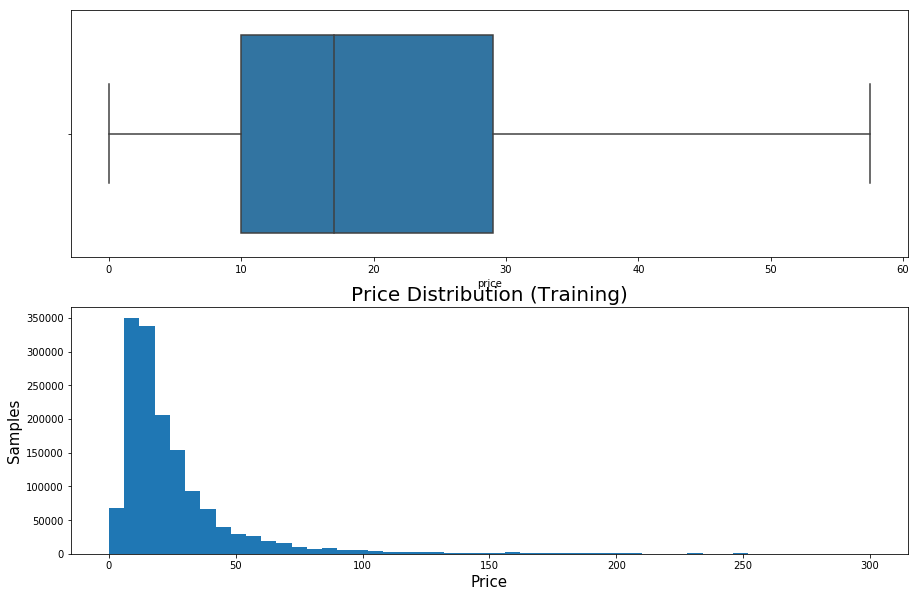

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.boxplot(y_dummy, showfliers = False, ax = ax[0])
#
ax[1].hist(y_dummy, bins = 50, range = [0, 300], label = "price")
ax[1].set_title("Price Distribution (Training)", fontsize = 20)
ax[1].set_xlabel("Price", fontsize = 15)
ax[1].set_ylabel("Samples", fontsize = 15)
plt.show()

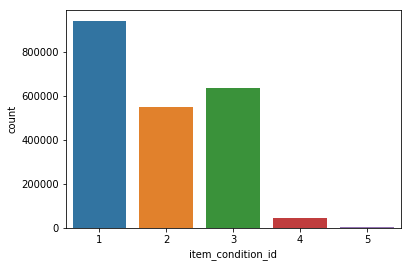

In [19]:
#based on item condition
fig = plt.plot( figsize = (15, 12))
sns.countplot(append_working.item_condition_id)

There are 5290 unique known brands.


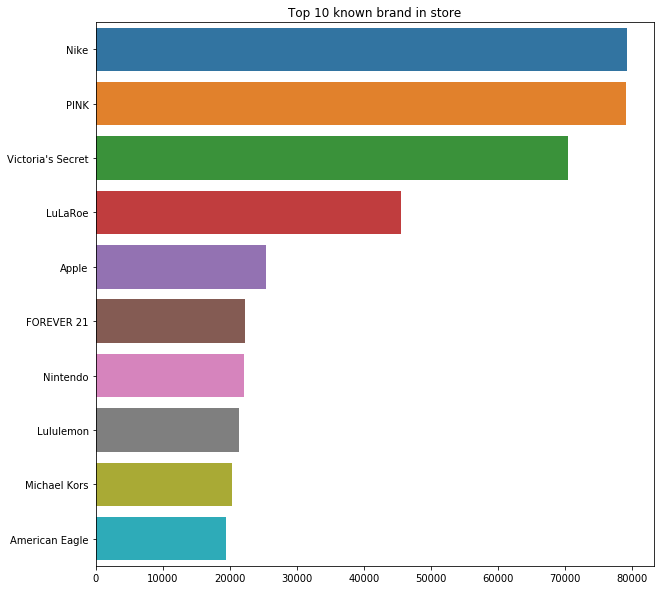

In [20]:
#Top brands
brands = append_working["brand_name"].value_counts()
print("There are", brands.size, "unique known brands.")
#
plt.figure(figsize = (10, 10))
sns.barplot(brands[1:11].values, brands[1:11].index)
plt.title("Top 10 known brand in store")
plt.show()

There are 1311 unique known brands.


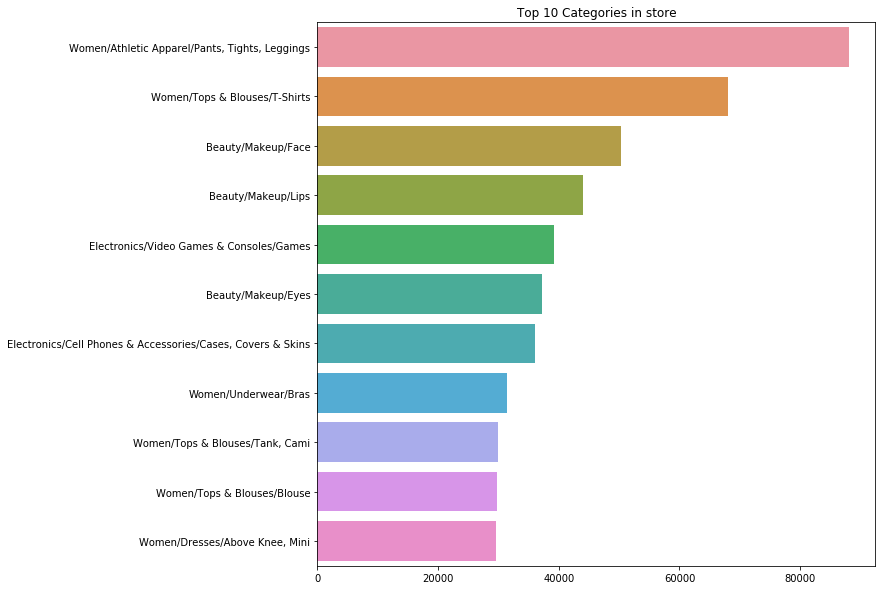

In [ ]:
category_name = append_working["category_name"].value_counts()
print("There are", category_name.size, "unique known brands.")
#
plt.figure(figsize = (10, 10))
sns.barplot(category_name[0:11].values, category_name[0:11].index)
plt.title("Top 10 Categories in store")
plt.show()

In [ ]:
append_working['main_category'] =  append_working['category_name'].str.split('/').str.get(0)

In [ ]:
append_working.head()

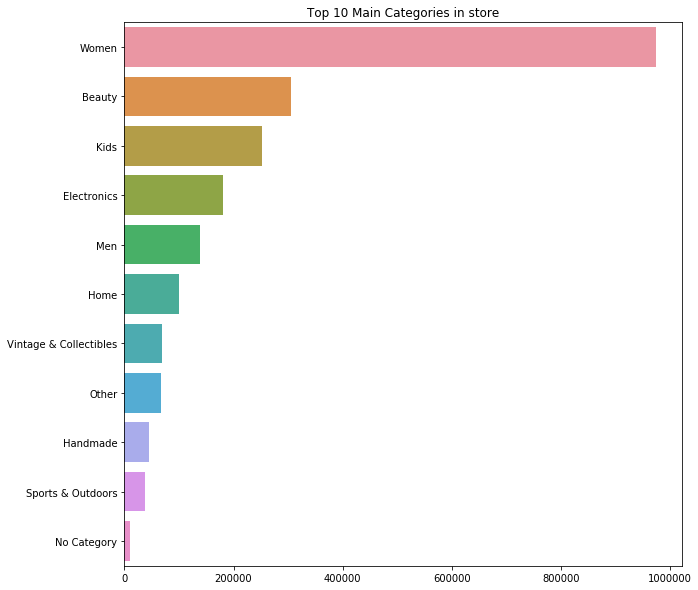

In [ ]:
main_category = append_working["main_category"].value_counts()
print("There are", main_category.size, "unique known brands.")
#
plt.figure(figsize = (10, 10))
sns.barplot(main_category[0:11].values, main_category[0:11].index)
plt.title("Top 10 Main Categories in store")
plt.show()

In [29]:
!pip install wordcloud

  Using cached wordcloud-1.3.1.tar.gz
  Running setup.py bdist_wheel for wordcloud: started
  Running setup.py bdist_wheel for wordcloud: finished with status 'error'
  Complete output from command C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\1004365\\AppData\\Local\\Temp\\pip-build-o2njllzx\\wordcloud\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\1004365\AppData\Local\Temp\tmpxi0iokq8pip-wheel- --python-tag cp35:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.5
  creating build\lib.win-amd64-3.5\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.5\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.5\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.5\wordcloud
 

  Failed building wheel for wordcloud
Command "C:\Users\1004365\AppData\Local\Continuum\Anaconda3\envs\tensorflow\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\1004365\\AppData\\Local\\Temp\\pip-build-o2njllzx\\wordcloud\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\1004365\AppData\Local\Temp\pip-ua7yy0so-record\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\1004365\AppData\Local\Temp\pip-build-o2njllzx\wordcloud\


In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(append_working.item_description.astype(str)))
plt.figure(figsize = (20, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

ImportError: No module named 'wordcloud'

# First Modelling

In [30]:
#train and cv and test split
data_train = append_working[append_working['Type'] == "train"]
data_test =  append_working[append_working['Type'] == "test"]
from sklearn.cross_validation import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(data_train, y_dummy)
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_dev ", X_dev.shape)
print("y_dev ", y_dev.shape)
print("data_test ", data_test.shape)
print("test data columns ", data_test.columns)

X_train  (1111901, 8)
y_train  (1111901,)
X_dev  (370634, 8)
y_dev  (370634,)
data_test  (693359, 8)
test data columns  Index(['name', 'item_condition_id', 'category_name', 'brand_name', 'shipping',
       'item_description', 'Type', 'main_category'],
      dtype='object')


In [31]:
train_text_data = X_train['item_description']
test_text_data = X_dev['item_description']

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, sublinear_tf=True, use_idf =True, stop_words = 'english')
train_corpus_tf_idf = vectorizer.fit_transform(train_text_data)
dev_corpus_tf_idf = vectorizer.transform(test_text_data)

In [ ]:
clf = RandomForestRegressor()
clf.fit(train_corpus_tf_idf, y_train)
predicted = clf.predict(dev_corpus_tf_idf)